# Chapter 7: Feature extraction in Python

The present notebook follows up on `chap7_R.ipynb` on clustering. Here we will consider another important unsupervised learning technique, that is feature extraction (also called feature learning, feature reduction). In particular, we will use Principal Component Analysis (PCA).


## 2. Principal Component Analysis

PCA is a multivariate analysis tool commonly used to transform a data set in such a way that the variances of each dependent variable can be viewed in unison in a low dimensional space. It functions as an effective linear dimensionality reduction technique. The method creates individual Principal Components (PCs), which describe the contributions to data variance, where the first order PC is aligned to capture the maximum variance in the data spread, the second order PC will then be aligned orthogonal to the first and so on. 

To learn how to use PCA, we will use as illustration some geochemical data (Lindsay et al., 2021) where: "_The main purpose of using PCA for the North Atlantic Igneous Province (NAIP) geochemical data set is to determine how elemental concentrations in the basaltic lavas are correlated to these PCs and by extension, which concentrations are controlled by similar factors._"

We will go back to `scikit-learn` (that we consistently used in chapters 2-3) to do PCA, via `sklearn.decomposition`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### 2.1. Load geochemical data


**EXERCISE 9:** Load the data `data/2021_Lindsay_etal_GeochemicalDataClust_suppl/1-s2.0-S1674987120302309-mmc1.csv` and define an array `X` with the 11 elements defined in terms of percentage or ppb (columns defined as `(Z)` mean Z-scores and are not considered here). Define also target `y` from the column `Location`. _Hint:_ Print some of the data, e.g. with `.head()`, or the list of columns with `.columns` to help you define `X`.

In [2]:
# YOUR CODE HERE

,ID,Source,Location,Fe2O3 (%),MgO (%),TiO2 (%),Cr (ppm),Ni (ppm),Cu (ppm),Ir (ppb),...,Cr (Z),Ni (Z),Cu (Z),Ir (Z),Ru (Z),Rh (Z),Pt (Z),Pd (Z),Pt/Pd,Pd/Ir
0,1,Momme et al. (2003),Iceland,14.90,5.05,4.59,28.0,35.0,39.0,0.040400,...,-0.956206,-0.775195,-1.183247,-0.746816,-0.683316,-1.056380,-1.324968,-1.187426,0.659574,11.633663
1,2,Momme et al. (2003),Iceland,10.10,10.10,0.96,506.0,186.0,120.0,0.150000,...,0.053455,-0.201514,-0.061289,-0.474778,0.554977,0.337289,-0.385261,-0.082642,0.670927,41.733333
2,3,Momme et al. (2003),Iceland,10.40,13.00,0.47,1173.0,562.0,81.0,0.240000,...,1.462333,1.226990,-0.601491,-0.251388,0.142213,0.214318,-0.160601,0.745468,0.483962,44.166667
3,4,Momme et al. (2003),Iceland,9.47,11.90,0.49,1342.0,352.0,88.0,0.290000,...,1.819305,0.429155,-0.504532,-0.127283,0.570853,1.034124,0.192091,1.108005,0.527200,43.103448
4,5,Momme et al. (2003),Iceland,13.20,6.04,2.51,117.0,55.0,90.0,0.012667,...,-0.768215,-0.699210,-0.476829,-0.815653,-0.786508,-1.056380,-1.293563,-1.240853,2.315789,15.000000


In [3]:
# YOUR CODE HERE

Index(['ID', 'Source', 'Location', 'Fe2O3 (%)', 'MgO (%)', 'TiO2 (%)',
       'Cr (ppm) ', 'Ni (ppm) ', 'Cu (ppm) ', 'Ir (ppb)', 'Ru (ppb)',
       'Rh (ppb)', 'Pt (ppb)', 'Pd (ppb)', 'Fe2O3 (Z)', 'MgO (Z)', 'TiO2 (Z)',
       'Cr (Z)', 'Ni (Z)', 'Cu (Z)', 'Ir (Z)', 'Ru (Z)', 'Rh (Z)', 'Pt (Z)',
       'Pd (Z)', 'Pt/Pd', 'Pd/Ir'],
      dtype='object')

In [4]:
# YOUR CODE HERE

**EXERCISE 10:** Plot all the pairs of parameters using `sns.pairplot(data_df, vars = ['feature1', 'feature2', ...], hue = 'target_name');`.

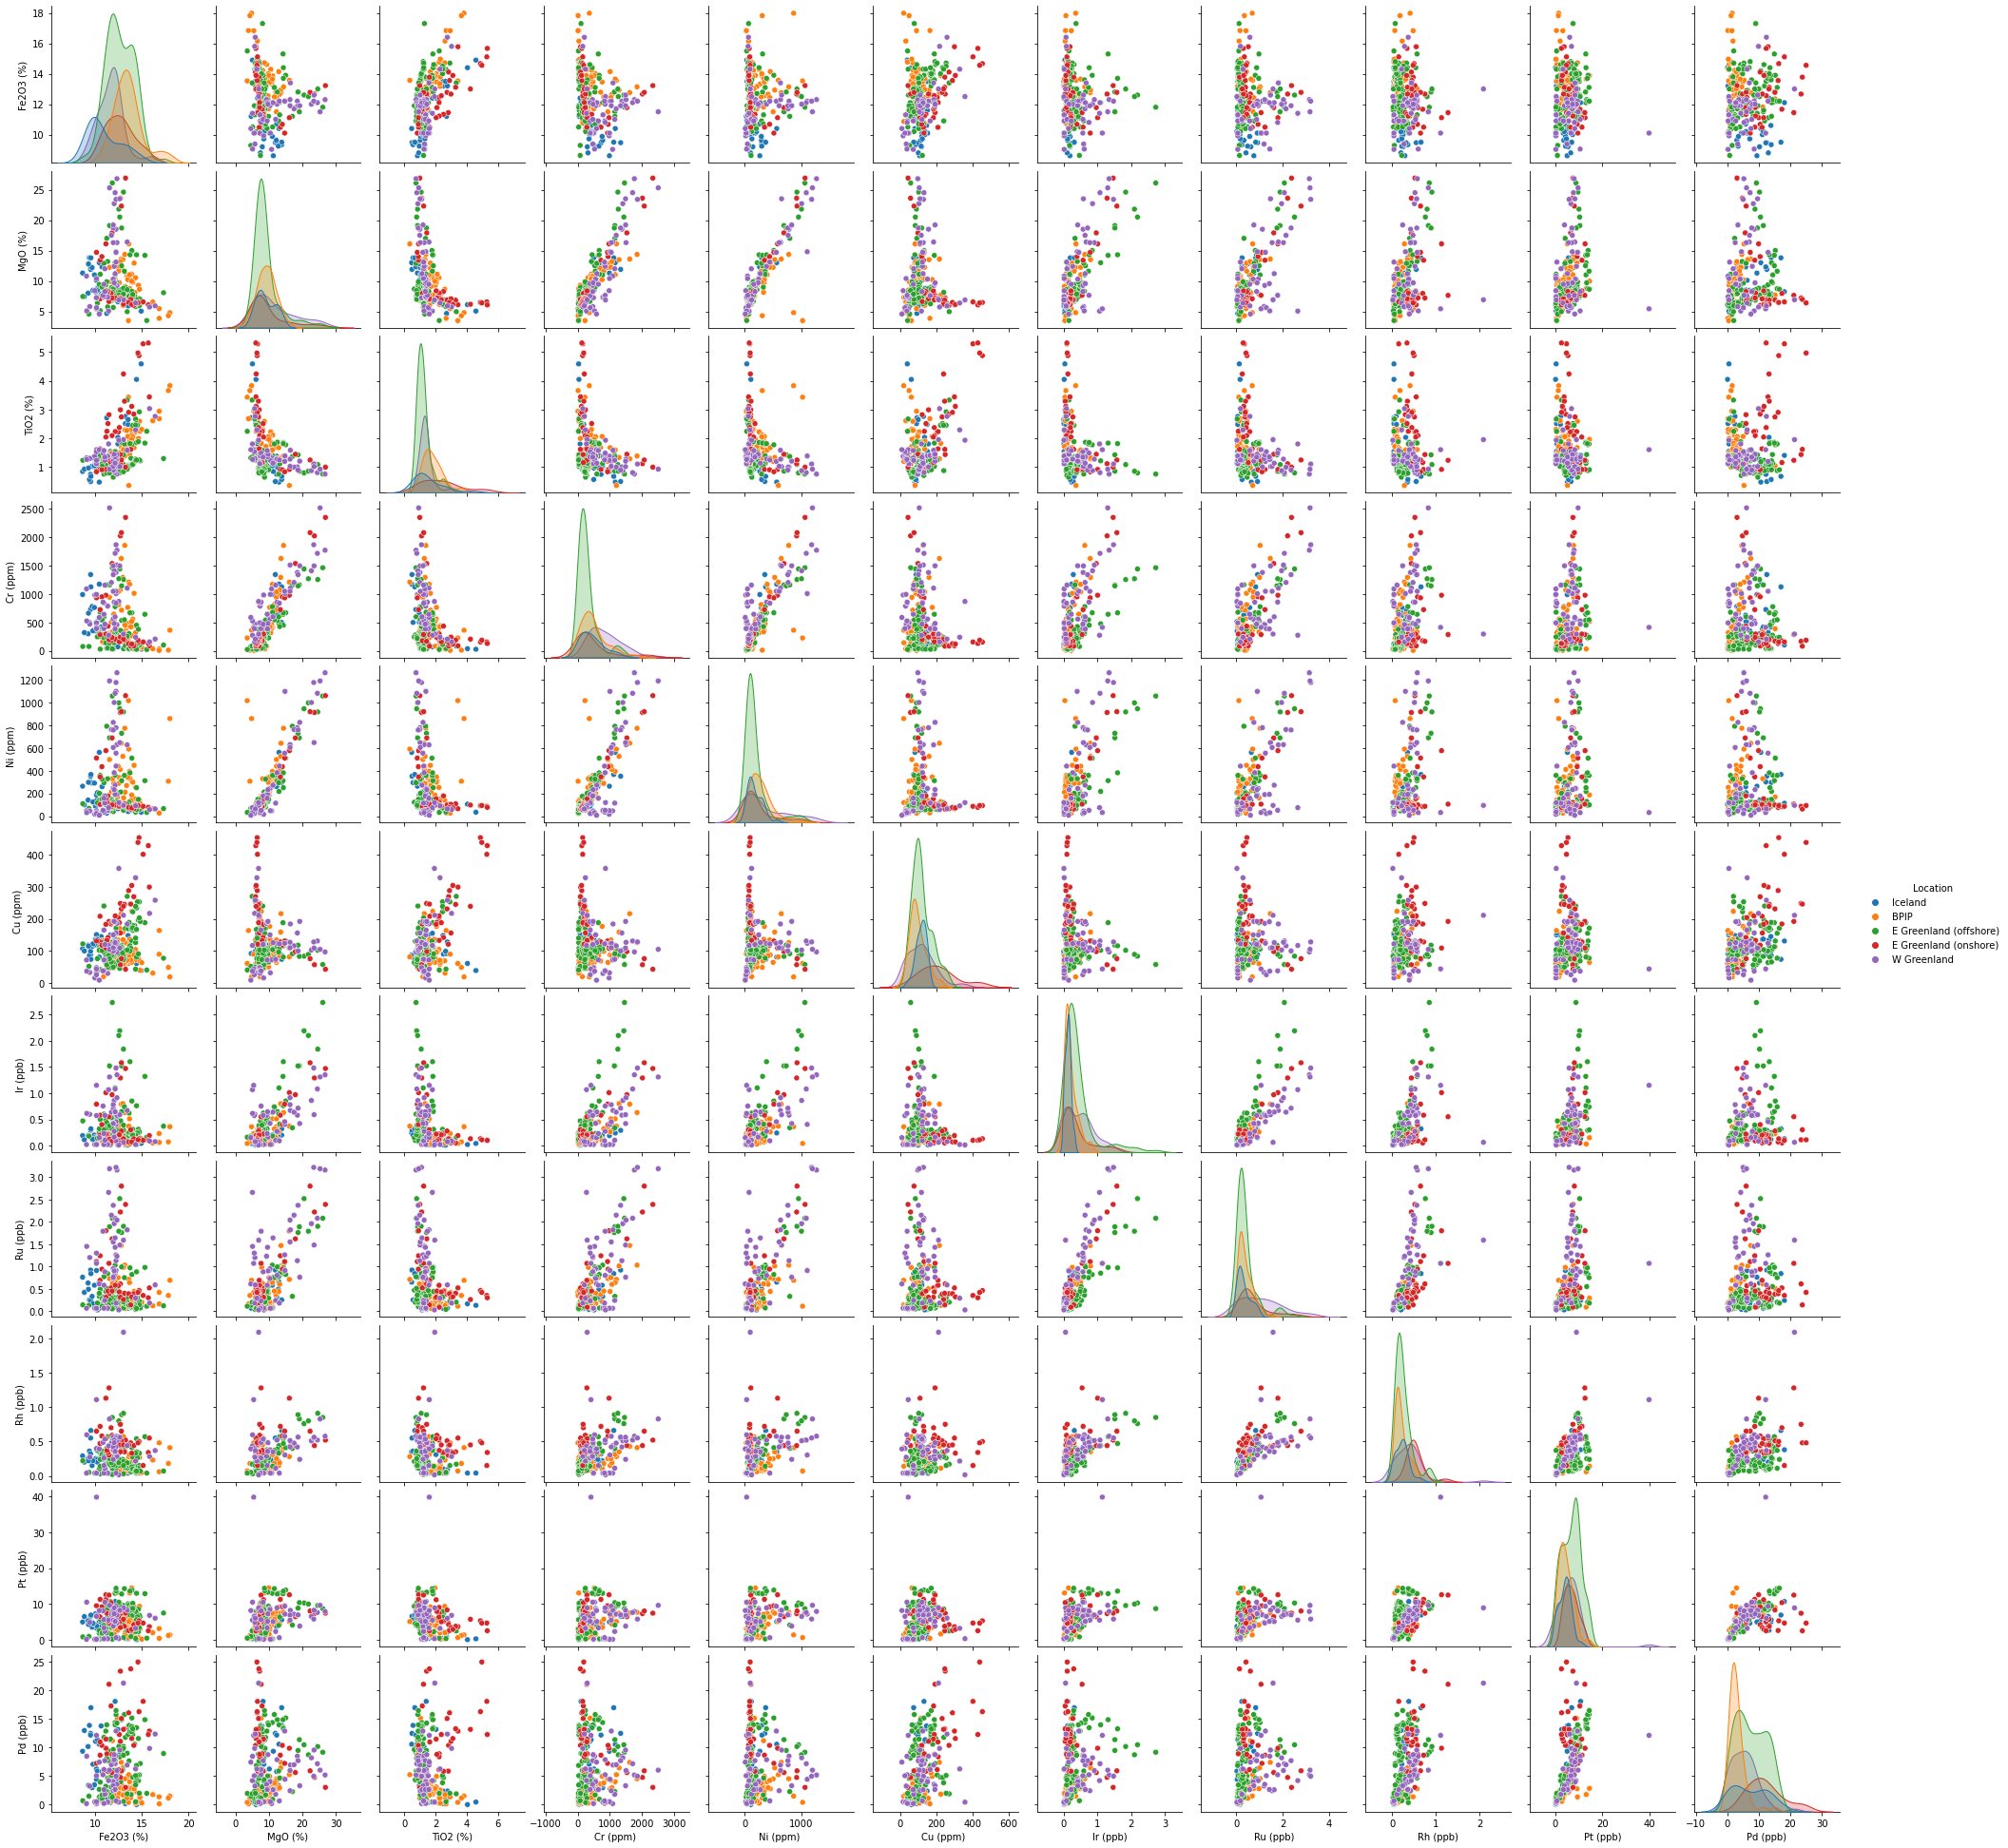

In [5]:
# YOUR CODE HERE

You have noticed that it is very difficult to find patterns in high dimensional data as we here need to study 121 pair plots! Let us use PCA to reduce the dimensionality of the problem.

### 2.2. PCA application

The platinum-group element (PGE) budget of lavas in the North Atlantic Igneous Province (NAIP) has been shown to vary systematically according to age, geographic location and geodynamic environment (Lindsay et al., 2021). Can we observe simple patterns with location as class `y`? PCA will help us better visualise if such patterns exist.

Note that the Platinum group includes ruthenium (Ru), rhodium (Rh), palladium (Pd), osmium (Os), iridium (Ir), and platinum (Pt).

**EXERCISE 11:** First you need to scale the features in `X` before applying PCA. Use `StandardScaler` to get mean = 0 and variance = 1. Verify for one feature that `X_norm` is correctly normalised.

In [6]:
# YOUR CODE HERE

Mean for feature 1: 1.1076510793943646e-15
Variance for feature 1: 1.0000000000000002


It is now time to apply `PCA(n_components = K)`. The method creates `K` individual Principal Components (PCs), which describe the contributions to data variance, where the first order PC is aligned to capture the maximum variance in the data spread, the second order PC will then be aligned orthogonal to the first and so on. Here, chemical elements with high correlation coefficients will likely be represented in the same PCs, and thus, reflect similar underlying controls.

We will calculate the first 2 PCs.

In [9]:
pca = PCA(n_components = 2)
PCs = pca.fit_transform(X_norm)
PCs.shape

(259, 2)

The PC vectors are defined in `.components_`:

In [10]:
print(pca.components_)

[[-0.10778812  0.41479538 -0.19091668  0.3910414   0.3887047  -0.07539883
   0.39572242  0.40903358  0.299118    0.21643766  0.09983029]
 [ 0.3010673  -0.09507327  0.31806483 -0.16575104 -0.08616688  0.50445008
   0.05401331  0.05428136  0.33078195  0.34081899  0.52758706]]


**EXERCISE 12:** Plot PC2 as a function of PC1 and overlay the eigen vectors. Here are the steps to follow:

1. Define a dataframe that includes the 2 PC columns named `PC1` and `PC2` as well as the data column `Location`. _Hints:_ Use `pd.DataFrame(data = data, columns = ['col1', ...])` and `pd.concat([df1, df2], axis = 1)`.
2. Fill the gaps in the plot template.

In [29]:
# YOUR CODE HERE

,PC1,PC2,Location
0,-3.152263,-0.193985,Iceland
1,0.317114,-0.727027,Iceland
2,1.836305,-1.087367,Iceland
3,2.194053,-0.549605,Iceland
4,-2.499278,-1.011019,Iceland
...,...,...,...
254,0.366074,0.940638,W Greenland
255,0.910211,0.563437,W Greenland
256,-0.381165,-0.620457,W Greenland
257,-0.337901,-1.477173,W Greenland


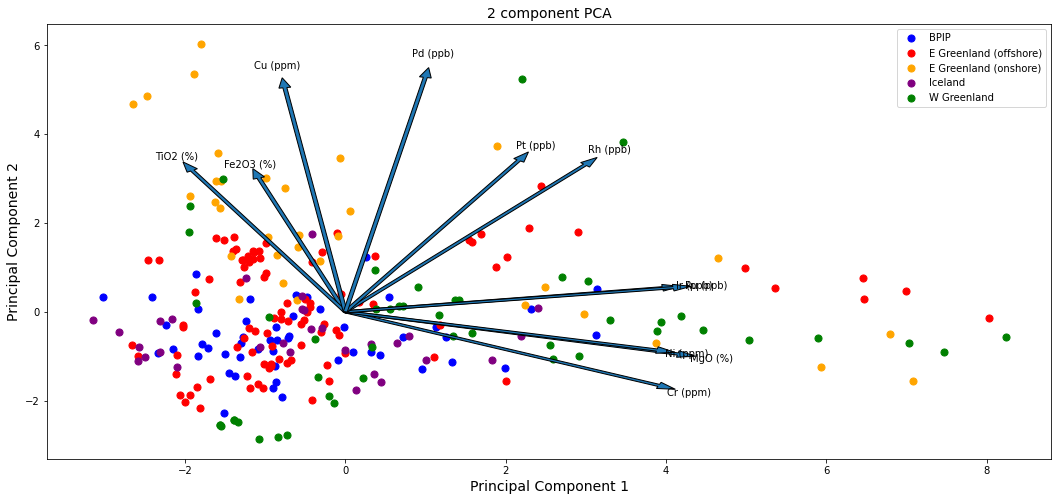

In [30]:
fig = plt.figure(figsize = (18,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 14)
ax.set_ylabel('Principal Component 2', fontsize = 14)
ax.set_title('2 component PCA', fontsize = 14)

# YOUR CODE HERE
#targets = ?


colors = ['blue', 'red', 'orange', 'purple', 'green']
for target, color in zip(targets, colors):
    # YOUR CODE HERE
#    ind = 
#    ax.scatter(PCs_df.loc[?, ?], PCs_df.loc[?, ?], c = color, s = 50)
    

ax.legend(targets)
for i in range(11):
    plt.arrow(0, 0, pca.components_[0,i] * 10, pca.components_[1,i] * 10, width=.05)
    plt.text(pca.components_[0,i] * 11, pca.components_[1,i] * 11, features[i], ha = 'center', va = 'center')

Here is how this plot can be interpreted: "_there are three major element vector groups in the PC1-PC2 space: MgO, Ni, Cr, Ir and Ru, positively attributed to PC1; Fe2O3, TiO2 and Cu, positively attributed to PC2; and Pd, Pt and Rh, positively attributed to both PC1 and PC2_" (Lindsay et al., 2021).

The variance explained by the first 2 PCs is:

In [31]:
pca.explained_variance_ratio_

array([0.43994105, 0.20061741])

### 2.3. Notes on clustering in Python

For completeness, Python functions are given below for the 2 clustering techniques described in R in the previous notebook.

In [47]:
#from sklearn.cluster import KMeans 

#kmeans = KMeans(n_clusters = K)
#kmeans.fit(X)
#y_kmeans = kmeans.fit_predict(X)

In [ ]:
#from sklearn.mixture import GaussianMixture

#gmm = GaussianMixture(n_components = K)
#gmm.fit(X)
#y_gmm = gmm.predict(X)

### 2.4. References

* Lindsay et al. (2021), A machine learning approach for regional geochemical data: Platinum-group element geochemistry vs geodynamic settings of the North Atlantic Igneous Province. Geoscience Frontiers, 12, 101098.